In [1]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

import utils

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
# load a dataset. Keras offers a way to access some public datasets
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


In [5]:
# Generate validation dataset, and scale features in the range 0-1
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1)
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [6]:
# Somewhat we are  supposed to know the name of the class associated with each index
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
def architecture():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation='relu'))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

def inspect(model):
    print(model.summary())
    print(model.layers)
model = architecture()
inspect(model)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None
[<tensorflow.python.keras.layers.core.Flatten object at 0x1386aea60>, <tensorflow.python.keras.layers.core.Dense object at 0x1386d7520>, <tensorflow.python.keras.layers.core.Dense object at 0x1386d7a00>, <tensorflow.python.keras.layers.core.De

In [8]:
model.summary()
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.002),
              metrics=[keras.metrics.sparse_categorical_accuracy])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 15s 9ms/step - loss: 1.1330 - sparse_categorical_accuracy: 0.6604 - val_loss: 0.7790 - val_sparse_categorical_accuracy: 0.7468
Epoch 2/30
1688/1688 [==============================] - 12s 7ms/step - loss: 0.6845 - sparse_categorical_accuracy: 0.7776 - val_loss: 0.6392 - val_sparse_categorical_accuracy: 0.7880
Epoch 3/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5894 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.5754 - val_sparse_categorical_accuracy: 0.8057
Epoch 4/30
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5410 - sparse_categorical_accuracy: 0.8204 - val_loss: 0.5383 - val_sparse_categorical_accuracy: 0.8123
Epoch 5/30
1688/1688 [==============================] - 14s 8ms/step - loss: 0.5101 - sparse_categorical_accuracy: 0.8280 - val_loss: 0.5138 - val_sparse_categorical_accuracy: 0.8223sparse_categorical_accuracy: 0. - ETA: 1s - loss: 0.5121 - sp
Epoch 6/30
1688/1688 [====

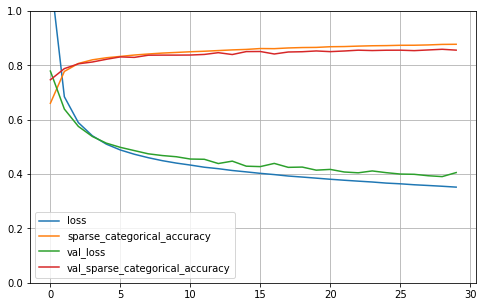

In [10]:
# plot the history
utils.print_history(history)

In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.4136 - sparse_categorical_accuracy: 0.8542


[0.4135756492614746, 0.854200005531311]

In [12]:
# Use the model to produce inferences
pred = model.predict(X_test[0].reshape(1, 28, 28))
print(pred.round(2)[0].argmax())

9
